In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Read the following csv file into a DataFrame: /Users/johanmasvie/programming/tiø4900/master_thesis/Data/GTF_IEA_202311 - Data.csv
df = pd.read_csv('/Users/johanmasvie/programming/tiø4900/master_thesis/Data/GTF_IEA_202311 - Data.csv')

# Drop the last two columns of the DataFrame
df = df.drop(df.columns[-2:], axis=1)

# Drop the third column of the DataFrame
df = df.drop(df.columns[2], axis=1)

# In columns from okt.-08 to nov.-23 replace NaN with 0
df = df.fillna(0)
df.head()

,Borderpoint,Exit,Entry,Countries,Capacity (mcm/h),Capacity missing initially (Y/N),Surpass capacity? (Y/N),Source,Comment,okt.-08,...,feb.-23,mars-23,apr.-23,mai-23,juni-23,juli-23,aug.-23,sep.-23,okt.-23,nov.-23
0,Adriatic LNG,Liquefied Natural Gas,Italy,"Italy, Liquefied Natural Gas","1,10",0,Yes,0,0,0.0,...,654.0,850.0,714.0,809.0,620.0,823.0,693.0,754.0,745.0,797.0
1,Almeria,Algeria,Spain,"Algeria, Spain","1,07",No,Yes,0,0,0.0,...,659.0,569.0,619.0,698.0,448.0,767.0,696.0,709.0,863.0,829.0
2,Alveringem,Belgium,France,"Belgium, France",0,Yes,#VALUE!,0,"Missing backhaul capacity, but limited backhau...",0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Alveringem,France,Belgium,"Belgium, France","0,37",No,Yes,0,0,0.0,...,616.0,185.0,240.0,392.0,396.0,195.0,50.0,394.0,371.0,728.0
4,Badajoz,Spain,Portugal,"Portugal, Spain","0,50",No,No,0,0,153.0,...,78.0,25.0,2.0,0.0,0.0,8.0,16.0,8.0,20.0,18.0


In [4]:

# Create a new dataframe containing only the columns from okt.-08 to nov.-23, i.e., dropping the first 9 columns
df2 = df.iloc[:, 9:]

# Reverse the order of the columns
df2 = df2.iloc[:, ::-1]

# Create a new column "Month of last non-zero flow" containing the month of the last non-zero flow
df2['Month of last non-zero flow'] = df2.apply(lambda x: x.ne(0).idxmax(), axis=1)

# Create a new column "# months since last non-zero flow" containing the number of months since the last non-zero flow
df2['# months since last non-zero flow'] = df2['Month of last non-zero flow'].apply(lambda x: df2.columns.get_loc(x))

# Concat only the columns "Month of last non-zero flow" and "# months since last non-zero flow" to the original DataFrame
df = pd.concat([df, df2[['Month of last non-zero flow', '# months since last non-zero flow']]], axis=1)

# Print the size of the DataFrame
print(df.shape)


(243, 193)


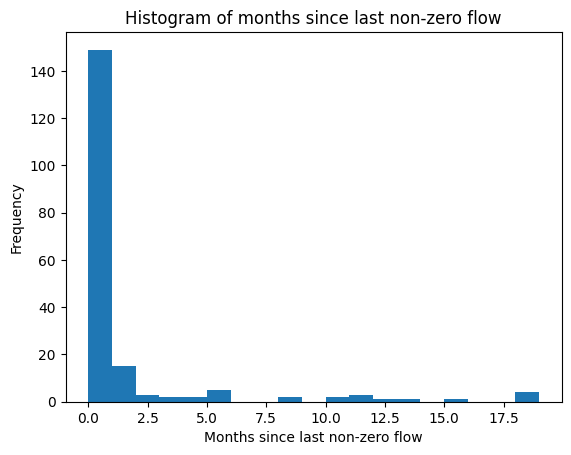

In [5]:
# Plot a histogram of the column "# months since last non-zero flow"
plt.hist(df['# months since last non-zero flow'], bins=range(0, 20))
plt.xlabel('Months since last non-zero flow')
plt.ylabel('Frequency')
plt.title('Histogram of months since last non-zero flow')
plt.show()
